# Model Evaluation Metrics

Define the evaluation metrics for evaluating the performance of a machine learning model, which is an integral component of any data science project. It aims to estimate the generalization accuracy of a model on the future (unseen/out-of-sample) data.

Reference: https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

## Confusion Matrix

In [1]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [3]:
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


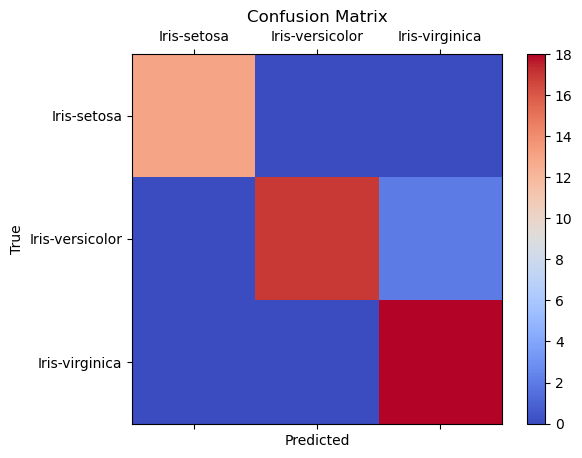

In [5]:
# Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels=labels)
print(cm)

# Plot the Confusion Matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap='coolwarm')
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Accuracy

In [1]:
#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [2]:
#ignore warnings
warnings.filter warnings('ignore')
# Load digits dataset
iris = datasets.load_iris()

In [7]:
# Load the iris dataset
iris = datasets.load_iris()

# Create feature matrix
X = iris.data
# Create target vector
y = iris.target

# Test size
test_size = 0.33

# Generate the same set of random numbers
seed = 7

# Cross-validation settings
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

# Model instance
model = LogisticRegression()

# Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print('Accuracy - val set: %.2f%% (%.2f)' % (results.mean() * 100, results.std()))

#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - val set: 96.67% (0.05)
Accuracy - test set: 92.00%


## Precision, Recall or Sensitivity, F1 Score

In [5]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:, :-1]
y = dat[:, -1]
test_size = 0.33
seed = 7

model = LogisticRegression()

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

# Fit model
model.fit(X_train, y_train)

# Predict on test set
pred = model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

# Calculate recall
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)

# Calculate F1 score
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)


Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


## Receiver Operating Characteristics (ROC) Curve

AUC - Test Set: 82.85%


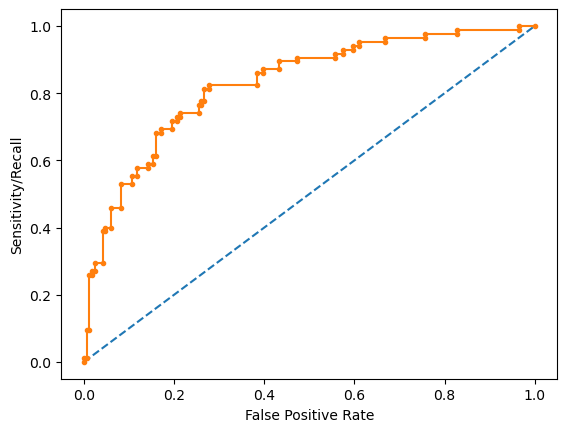

In [8]:
#Classification Area under curve
import warnings
import pandas
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:, :-1]
y = dat[:, -1]
test_size = 0.33  # Adding test_size definition
seed = 7

# Split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

# Fit model
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc * 100))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the ROC curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('Sensitivity/Recall')

# Show the plot
plt.show()


## Log Loss

In [9]:
#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 8.23
